In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
df=pd.read_csv("mental_health_expanded_data.csv")
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   age                                6820 non-null   int64 
 1   income                             6820 non-null   int64 
 2   education_level                    6820 non-null   object
 3   employment_status                  6820 non-null   object
 4   gender                             6820 non-null   object
 5   social_media_usage                 6820 non-null   int64 
 6   exercise_frequency                 6820 non-null   object
 7   sleep_quality                      6820 non-null   object
 8   social_support                     6820 non-null   object
 9   marital_status                     6820 non-null   object
 10  housing_situation                  6820 non-null   object
 11  access_to_mental_health_resources  6820 non-null   object
 12  mental

In [4]:
df.describe()

,age,income,social_media_usage,mental_health_status
count,6820.000000,6820.000000,6820.000000,6820.000000
mean,48.941349,57143.066422,3.508358,0.521408
std,17.938050,24572.744746,2.270481,0.499578
min,18.000000,15015.000000,0.000000,0.000000
25%,34.000000,35719.000000,2.000000,0.000000
50%,49.000000,57258.000000,4.000000,1.000000
75%,65.000000,78358.750000,5.000000,1.000000
max,79.000000,99983.000000,7.000000,1.000000


In [5]:
df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
print(df.shape)

In [ ]:
print(df.head())

In [ ]:
print(df.isna().sum())

In [6]:
from scipy import stats 
duplicates=df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6815    False
6816    False
6817    False
6818    False
6819    False
Length: 6820, dtype: bool


In [7]:
sorted_df=df.sort_values(by='age',ascending=False)
sorted_df.head()

,age,income,education_level,employment_status,gender,social_media_usage,exercise_frequency,sleep_quality,social_support,marital_status,housing_situation,access_to_mental_health_resources,mental_health_status
5974,79,81046,Associate,Employed,Female,3,Regular,Average,Low,Married,Homeless,Poor,0
5745,79,97096,Doctorate,Employed,Female,0,Occasional,Poor,High,Widowed,Homeless,Good,0
2778,79,59045,Bachelor,Employed,Non-Binary,1,Regular,Good,Moderate,Widowed,Rent,Good,1
4795,79,43400,Doctorate,Retired,Female,6,Regular,Average,Moderate,Divorced,Live with Family,Good,1
142,79,85601,Associate,Retired,Female,1,Regular,Good,High,Widowed,Homeless,Moderate,1


In [8]:
df_30_and_less=df[df['age']<=30]
df_30_and_less.head()

,age,income,education_level,employment_status,gender,social_media_usage,exercise_frequency,sleep_quality,social_support,marital_status,housing_situation,access_to_mental_health_resources,mental_health_status
7,28,36395,Bachelor,Student,Male,2,Occasional,Average,Moderate,Divorced,Homeless,Good,1
8,28,25725,Bachelor,Retired,Female,4,Occasional,Good,Moderate,Married,Own,Good,1
12,20,86260,Master,Employed,Male,5,Regular,Poor,High,Single,Own,Moderate,1
13,19,88568,Associate,Retired,Female,2,Regular,Average,Low,Widowed,Rent,Poor,0
33,20,36876,Associate,Student,Male,2,Occasional,Good,Moderate,Married,Live with Family,Poor,1


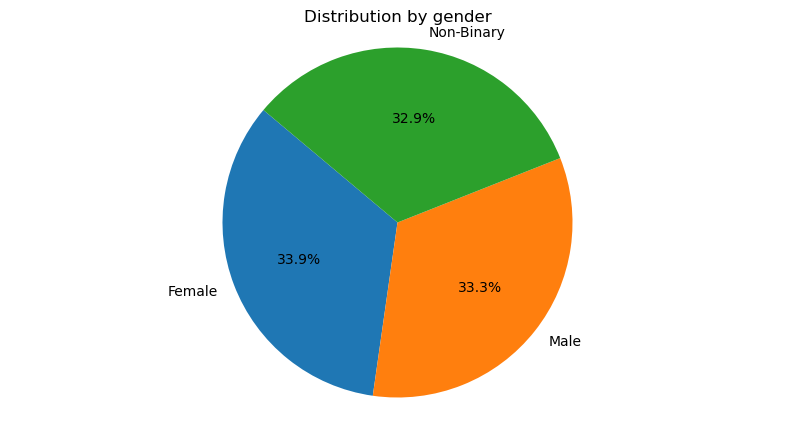

In [9]:
import matplotlib.pyplot as plt
gender_counts=df['gender'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(gender_counts,labels=gender_counts.index,
autopct='%1.1f%%',startangle=140)
plt.title('Distribution by gender')
plt.axis('equal')
plt.show()

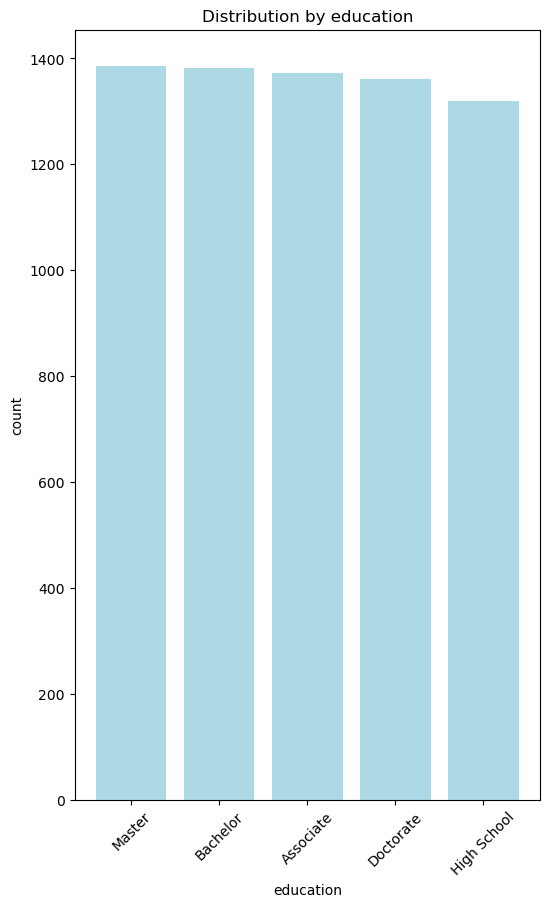

In [10]:
education_counts=df['education_level'].value_counts()
plt.figure(figsize=(6,10))
plt.bar(education_counts.index,education_counts.values,
color='lightblue')
plt.xlabel('education')
plt.ylabel('count')
plt.title('Distribution by education')
plt.xticks(rotation=45)#Rotate labels if needed for better readability
plt.show()

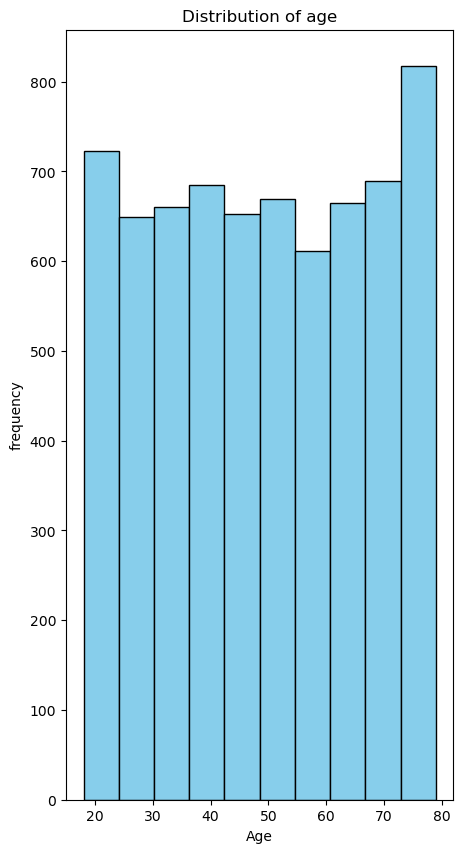

In [11]:
plt.figure(figsize=(5,10))
plt.hist(df['age'],bins=10,color='skyblue',edgecolor='black')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

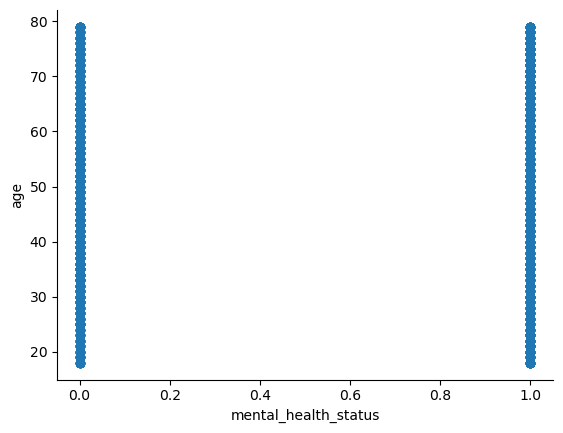

In [12]:
df.plot(kind='scatter', x="mental_health_status", y="age", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

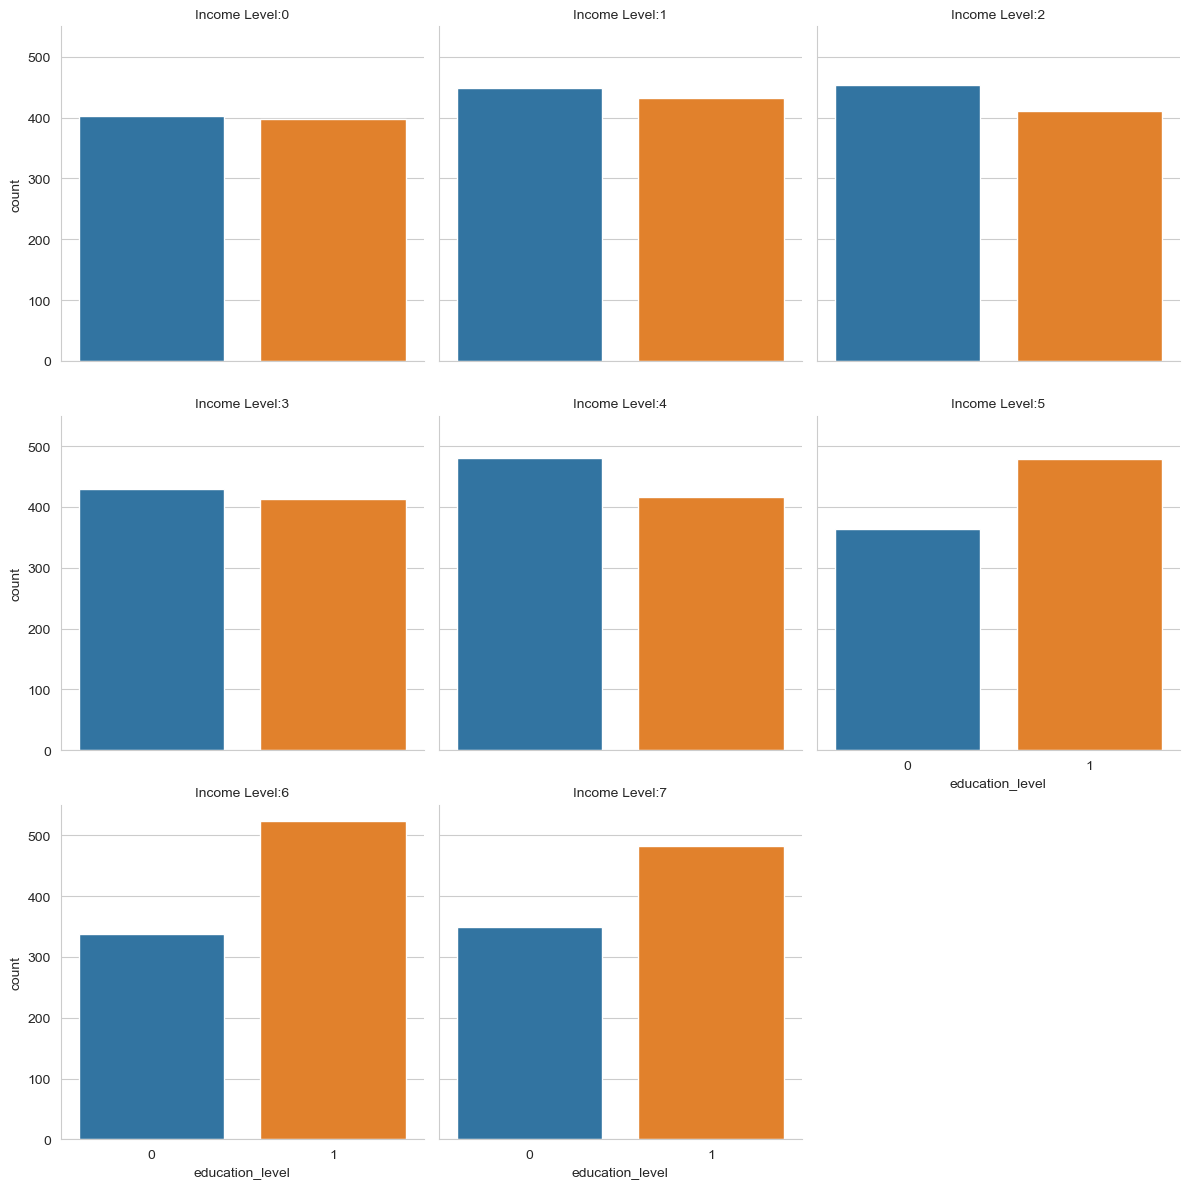

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df=pd.read_csv("mental_health_expanded_data.csv")
df.head()
g = sns.catplot(
    data=df,
    x="mental_health_status",
    col="social_media_usage",
    kind="count",
    height=4,
    aspect=1,
    col_wrap=3
)
g.set_axis_labels("education_level","count")
g.set_titles("Income Level:{col_name}")
g.tight_layout()
plt.show()

In [14]:
# We are Checking  for any missing values in our  DataFrame
print(df.isnull().sum())


age                                  0
income                               0
education_level                      0
employment_status                    0
gender                               0
social_media_usage                   0
exercise_frequency                   0
sleep_quality                        0
social_support                       0
marital_status                       0
housing_situation                    0
access_to_mental_health_resources    0
mental_health_status                 0
dtype: int64


In [15]:
# Now after cleaning our data we are going to the next step of Preprocessing the Data
# Now we are selecting the dependent and independent variable
X= df[['age','education_level', 'employment_status', 'gender',
        'social_media_usage', 'exercise_frequency', 'sleep_quality',
        'social_support', 'marital_status', 'housing_situation', 
        'access_to_mental_health_resources']]

y= df['mental_health_status']

In [16]:
# Our next is to encode the categorical variables 
categorical_cols = ['education_level', 'employment_status', 'gender', 
                    'exercise_frequency', 'sleep_quality', 'social_support',
                    'marital_status', 'housing_situation', 
                    'access_to_mental_health_resources']

In [17]:
#checking the number of columns and row in our dataframe
print(df.shape)

(6820, 13)


In [18]:
# We are using  one-hot to encode categorical variables into a set of binary features, to them compatible to our algorithm
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [19]:
#  Splitting our Data into two one for testing and the other for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
#checking the number of columns and row in our dataframe
print(df.shape)


(6820, 13)


In [21]:
model = LogisticRegression(max_iter=1000)

In [22]:
#  Training our model using Logistic Regression Model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [24]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63      1009
           1       0.64      0.68      0.66      1037

    accuracy                           0.65      2046
   macro avg       0.65      0.64      0.64      2046
weighted avg       0.65      0.65      0.64      2046



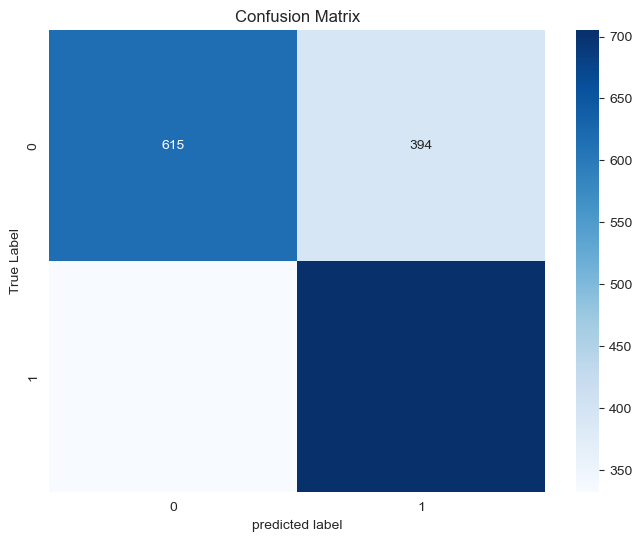

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot
import  seaborn as sns 
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('predicted label')
plt.ylabel('True Label')
plt.show()

In [26]:
import joblib
joblib_file = "logistic_regression_model.joblib"
joblib.dump(model, joblib_file)

['logistic_regression_model.joblib']